# **Train YOLOv5 PyTorch on your own Custom Dataset**

## <font color='blue'>Before starting make sure to go to **File** in the menu bar and click on "Save a copy in drive" to save a copy of this notebook to your Google Drive where you can edit from. DO NOT MAKE CHANGES TO THIS NOTEBOOK. Also remember to change your Runtime to "GPU" before starting. Good Luck! </font>

## **Step 1: Upload your custom dataset**

Here we will upload a *custom vehicle Dataset* for testing however you can upload your own custom dataset onto this directory using the Google Colab upload function or upload the dataset onto your Google Drive, just make sure that your data follows the **same format** as can be seen in the "yolov5_dataset" folder and make sure to create a **data.yaml** file as well.

In [ ]:
%cd /content
!unzip dataset.zip; rm dataset.zip

/content
Archive:  dataset.zip
 extracting: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/106_png.rf.b37b5c79e7de9534b9c96ed0f0b985fd.jpg  
 extracting: test/images/16_png.rf.f241aa737e83934f11fda9a24d397502.jpg  
 extracting: test/images/2_png.rf.b011a204248916eff87d6ef5bc46b2c1.jpg  
 extracting: test/images/32_png.rf.86c4ad4f9fa599186346ab92cae5e6b0.jpg  
 extracting: test/images/38_png.rf.c75831c0df8c031e3517b9fa0ecd5c17.jpg  
 extracting: test/images/42_png.rf.a6416fdb44a9c09a8d8a688b7c544b64.jpg  
 extracting: test/images/47_png.rf.ac335ecacaed934d5b16b0aa739b1fb7.jpg  
 extracting: test/images/73_png.rf.48673d29c8e5e1eb3a166b9872a9556d.jpg  
 extracting: test/images/77_png.rf.e535fb6c45e6ff84aa3147137998191e.jpg  
 extracting: test/images/79_png.rf.36840acb947d52c4ff2a7cae21e58f67.jpg  
 extracting: test/images/81_png.rf.948ec8e77bac9aadb1a8ca39631599c8.jpg  
 extracting: test/images/86_png.rf

## **Step 2: Mount your google drive to the colab** [if your dataset is stored on your Google Drive]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/MyDrive/ is equal to /mydrive
!ln -s /content/gdrive/MyDrive/ /mydrive
!ls /mydrive

 1.jpg
 20210219OCRAnnotation
'Annotation tools analysis'
 best.pt
'Certifai Common Issue'
 classifaiNotReadable.jpg
 classifaiUnreadableFolder
'Colab Notebooks'
'Data Annotation Guide'
 fakeImage.zip
'Guide to Build Classifai Frontend Code.gdoc'
 hat.zip
 MajorIncomplete
 MajorIncompleteOther
'March Sharing'
'Mcdonalds Project Solutions.gslides'
 ModelAndAlgorithm
'OCR Annotation Quality & Quantity.gdoc'
'OCR Annotation Quality & Quantity Overall Report.gdoc'
 PartlyIncomplete
 PartlyIncompleteOther
 RemoApp
 Rotation
 social_distance_recording_12012021_Trimmed.mp4
 social_distance_recording_2_12012021_Trimmed.mp4
'Sony camera comparison.gsheet'
 src
'Sum Yin Chuang.gdoc'
'Template for Writing .gdoc'
'Untitled document.gdoc'
'UUID Generator.gdoc'
 Watermark
 WrongOrientation


## **Step 3: Clone YOLOv5 Repo and install all dependencies**

In [ ]:
!git clone https://github.com/ultralytics/yolov5   # clone the repo
!pip install -qr yolov5/requirements.txt   # install dependencies
%cd yolov5

import torch
from IPython.display import Image, clear_output   # to display image 
from utils.google_utils import gdrive_download   # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


## **Step 4: Let's have a look at our data.yaml file**

Let's visualize our data.yaml file just to verify that our train and valid dataset locations are all right and the number of classes are also correct.

In [ ]:
%cat /content/data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['person', 'wheel chair', 'not wheel chair']


## **Step 5: Train yolov5 on your custom dataset using pre-trained weights**

There are 4 pre-trained models that you can choose from to start training your model and they are: yolov5s, yolov5m, yolov5l and yolov5x. For more details on these models please check out [yolov5 models](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data#4-select-a-model).

Here, we are able to pass a number of arguments including:
- **img:** Define input image size
- **batch:** Specify batch size
- **epochs:** Define the number of training epochs (note - typically we will train for more than 100 epochs)
- **data:** Set the path to our yaml file
- **cfg:** Specify your model configuration
- **weights:** Specify a custom path to weights.
- **nosave:** Only save the final checkpoint
- **cache:** Cache images for faster training   
- **device** "0" for GPU and "cpu" for CPU  

*Note: If your dataset and data.yaml are located on your Google Drive, simply replace the data file location with your data.yaml file location example:*
 '/mydrive/yolov5_dataset/data.yaml'

In [ ]:
%%time
%cd yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data '../data.yaml' --weights yolov5s.pt --name yolov5s_results --cache 

[Errno 2] No such file or directory: 'yolov5/'
/content/yolov5
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v4.0-189-gc03d590 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='../data.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov5s_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5s_results', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-08 14:29:54.251100: I 

## **Step 6: Evaluate Your Custom YOLOv5 Detector Performance**

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes. Now, let's view our model performance.

In [ ]:
# Start tensorboard
# Launch after you have finished training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

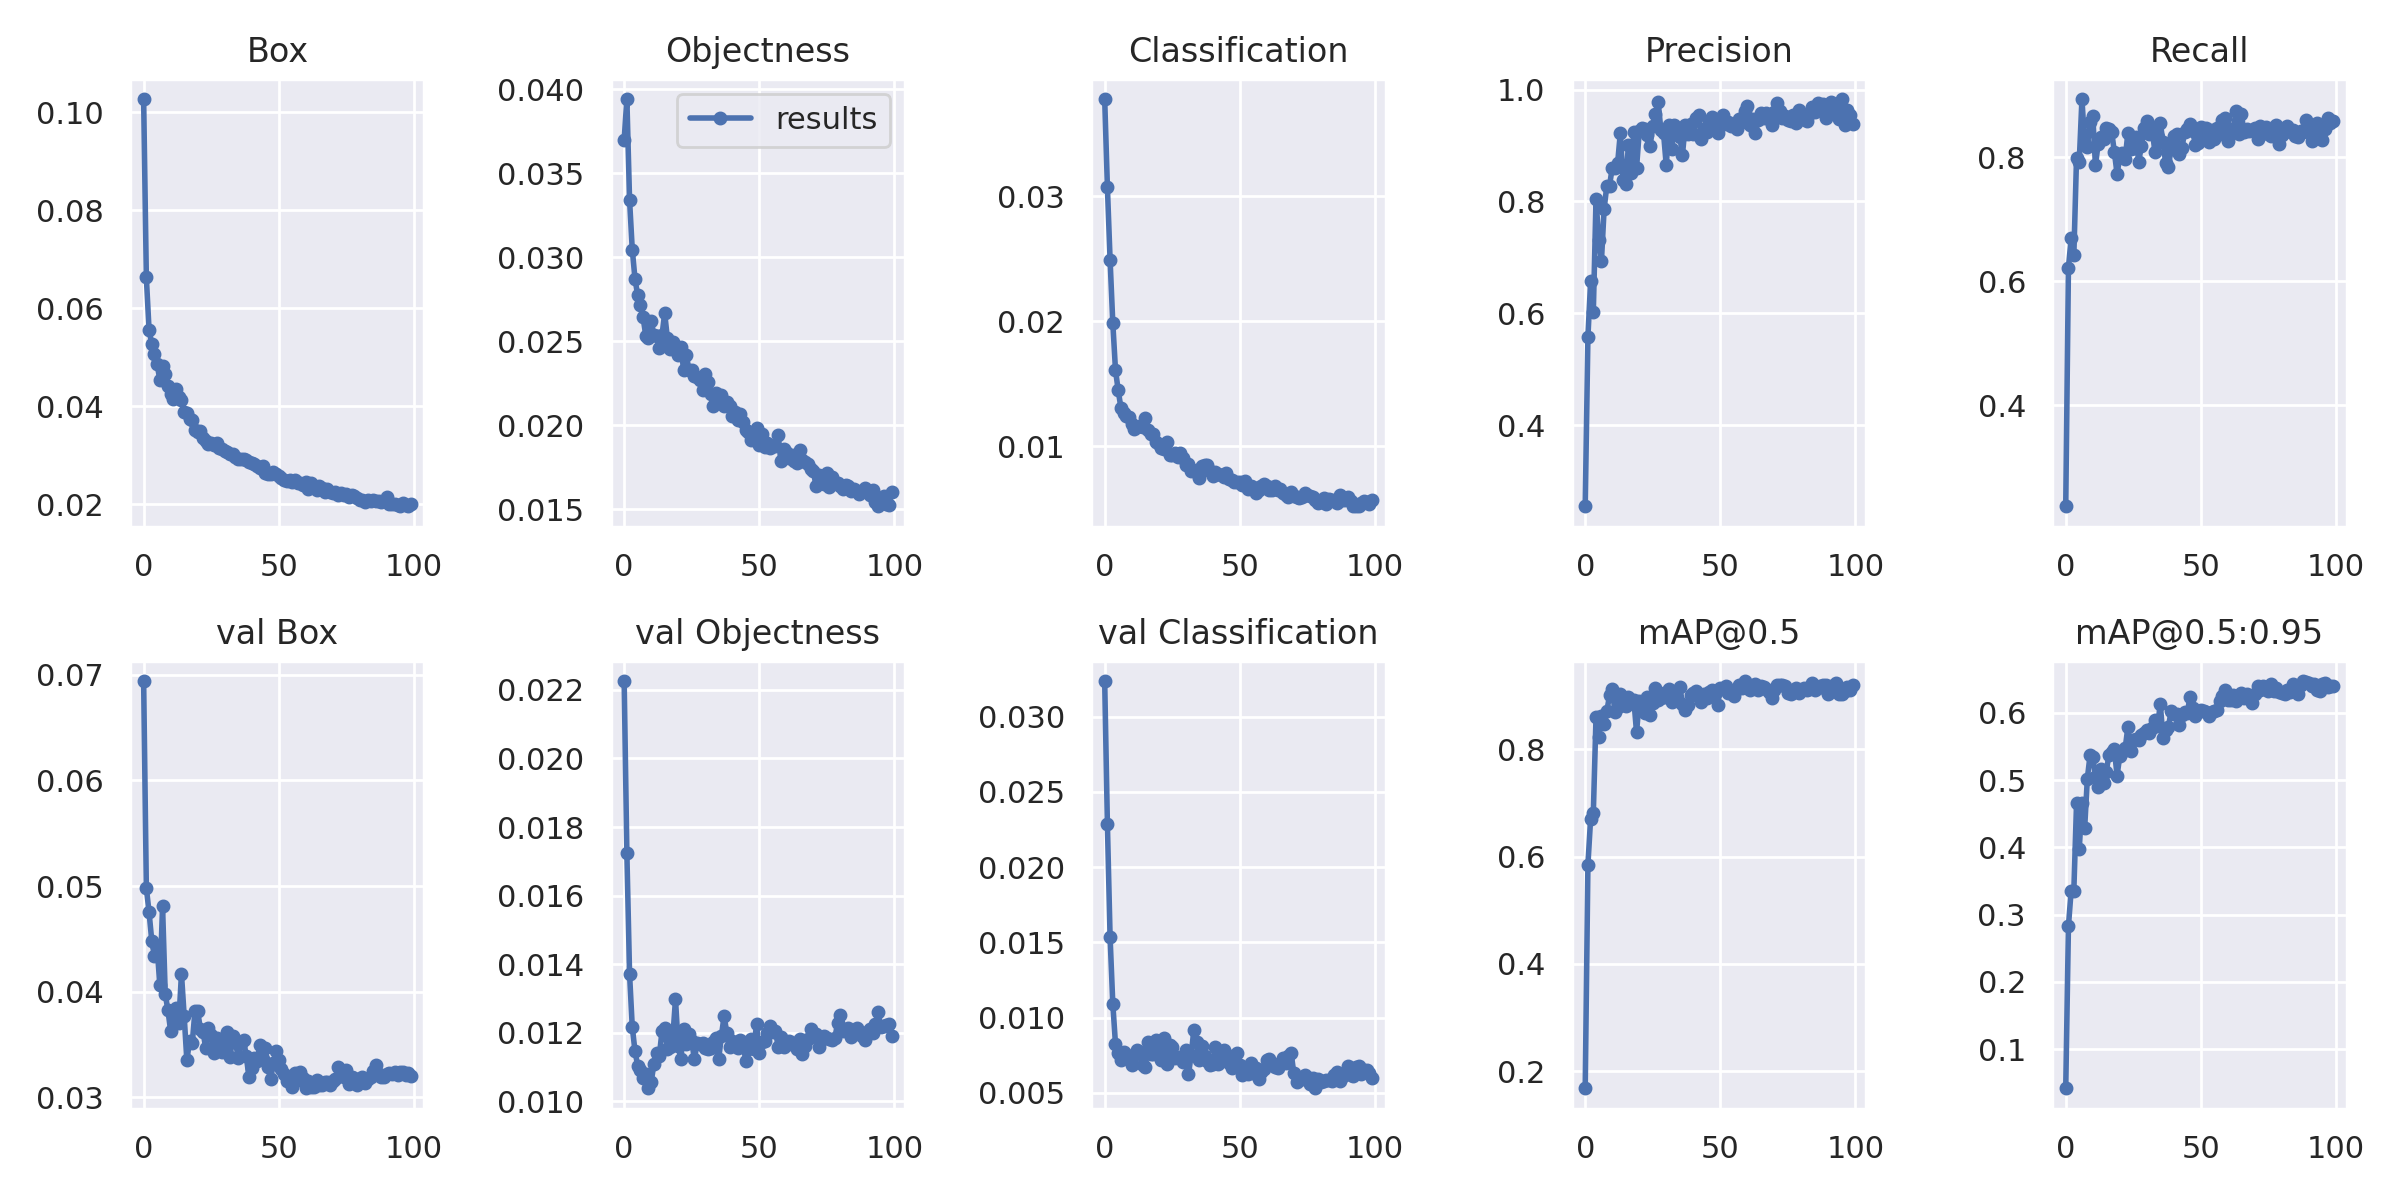

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

GROUND TRUTH TRAINING DATA:


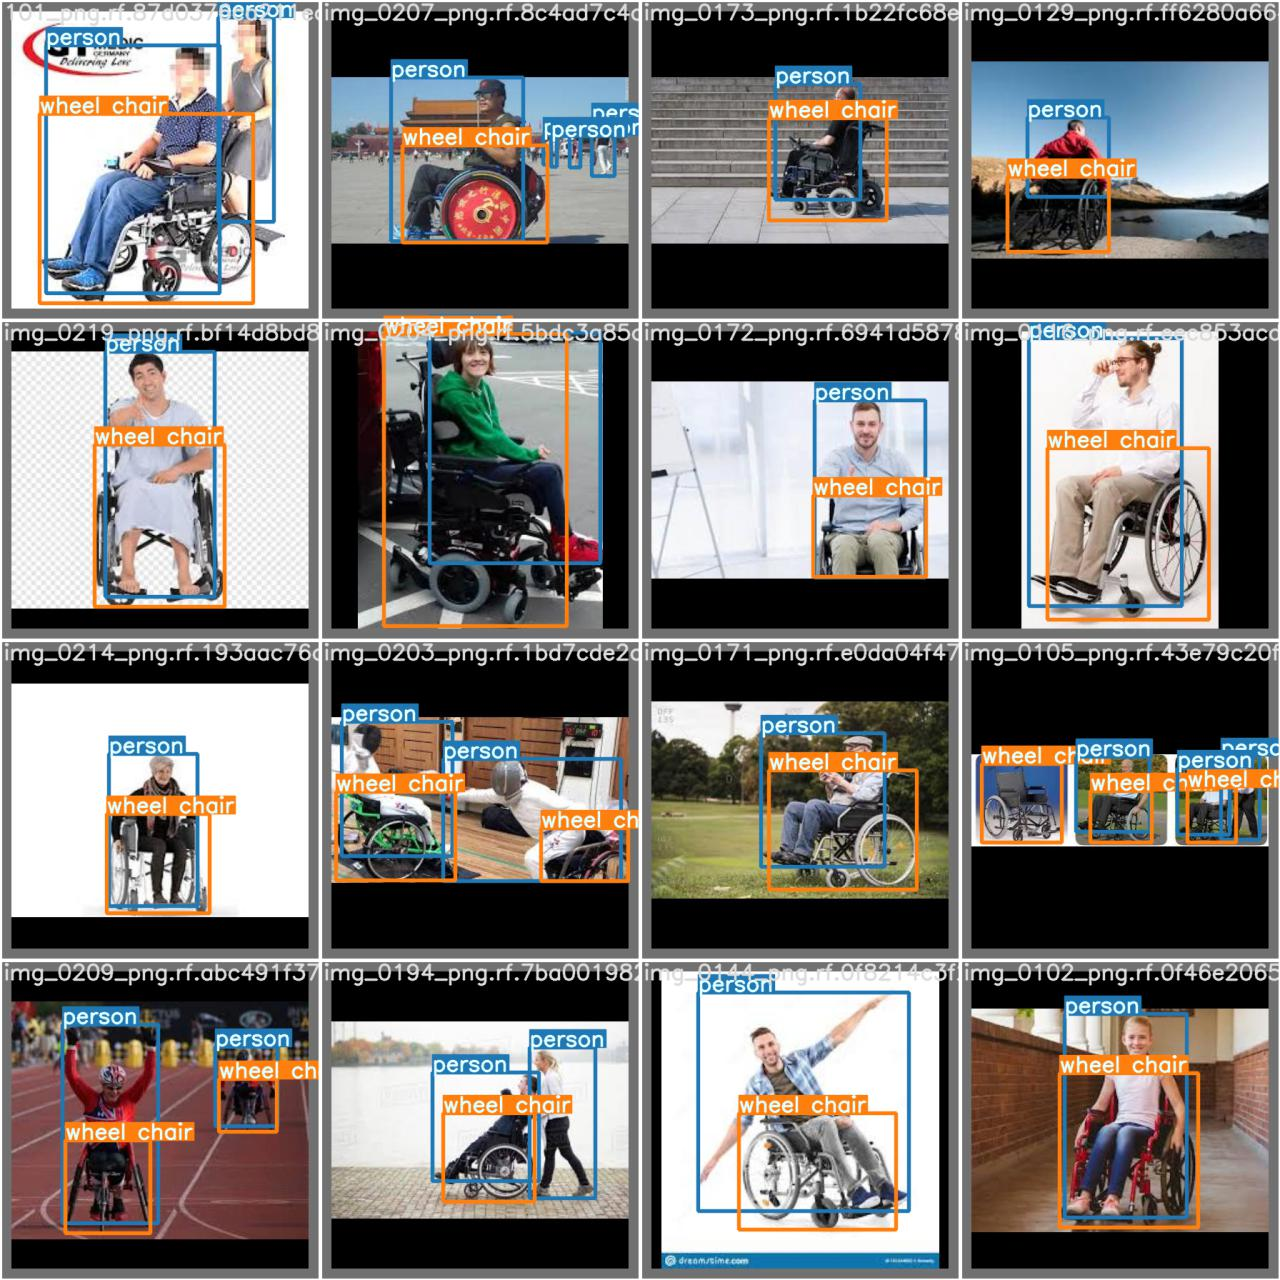

In [ ]:
# Just for curiosity, let's display some of our Training Data along with their labels
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/test_batch0_labels.jpg', width=900)

GROUND TRUTH TRAINING DATA:


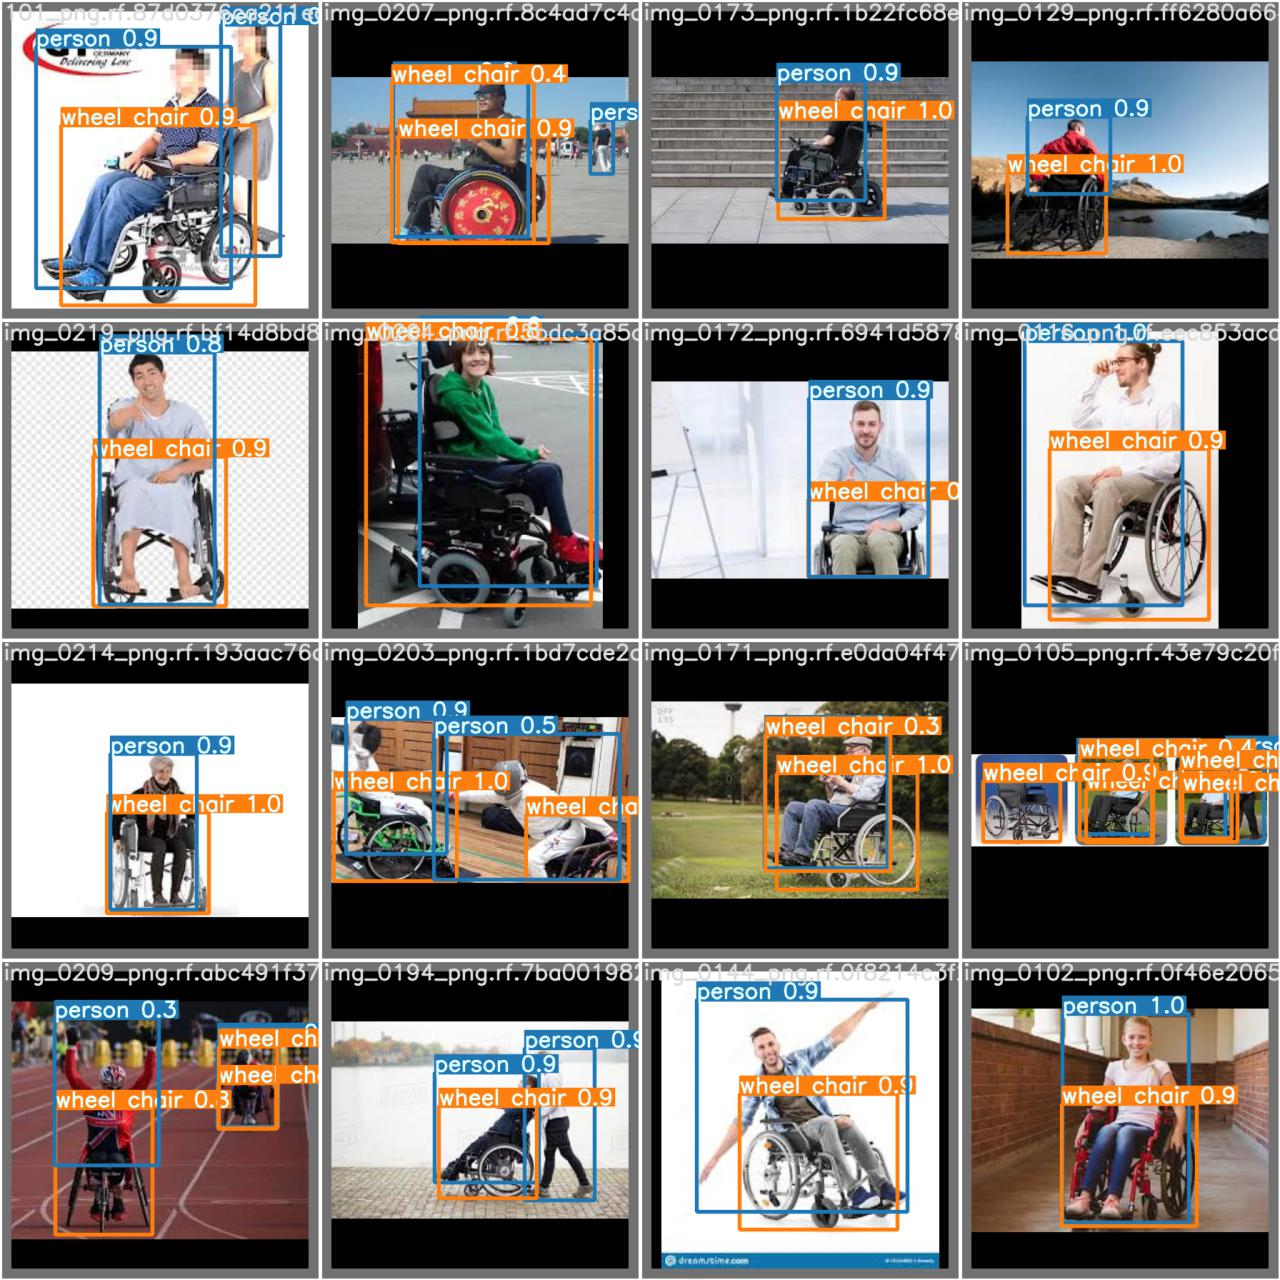

In [ ]:
# Now let's display the predictions made by our model for those Training samples
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/test_batch0_pred.jpg', width=900)

## **Step 7: Run Inference Using Your Trained Weights.**

### detect.py runs inference on a variety of sources and saves the results to runs/detect

!python detect.py --source  
                            **webcam**: 0  
                            **image**: file.jpg  
                            **video**: file.mp4  
                            **directory**: path/   
                            **glob**: path/'.jpg      
                            **rtsp stream**: rtsp://170.93.143.139     
                            **rtmp stream**: rtmp://192.168.1.105/live/test     
                            **http stream**: http:/112.50.243.8/PLTV/88888888  

### *Don't forget to copy the location of the weights file and replace it in the code below*

In [ ]:
%cd yolov5/
!python detect.py --source '../test/images/*' --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4

[Errno 2] No such file or directory: 'yolov5/'
/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='../test/images/*', update=False, view_img=False, weights=['runs/train/yolov5s_results/weights/best.pt'])
YOLOv5 🚀 v4.0-189-gc03d590 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/52 /content/yolov5/../test/images/106_png.rf.b37b5c79e7de9534b9c96ed0f0b985fd.jpg: 416x416 1 person, 1 wheel chair, Done. (0.022s)
image 2/52 /content/yolov5/../test/images/16_png.rf.f241aa737e83934f11fda9a24d397502.jpg: 416x416 1 person, 1 wheel chair, Done. (0.022s)
image 3/52 /content/yolov5/../test/images/2_png.rf.b011a204248916eff87d6ef5bc46b2c1.jpg: 416x416 1 person, 1 wheel chair, Done. (0.022s)
image 4/52 /content/yolov5/

## **Step 8: Now lets view the tested images with their preditions.**
### *Remember to replace the file location in the code below with that obtained from the detect.py run.*

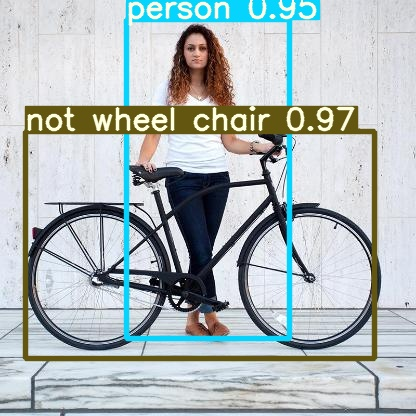

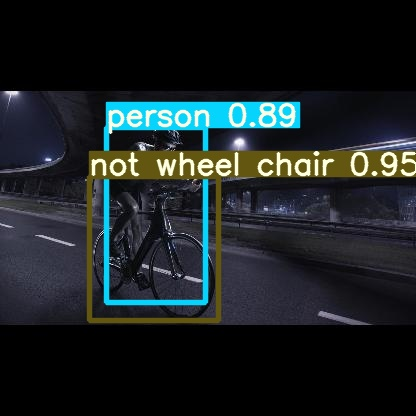

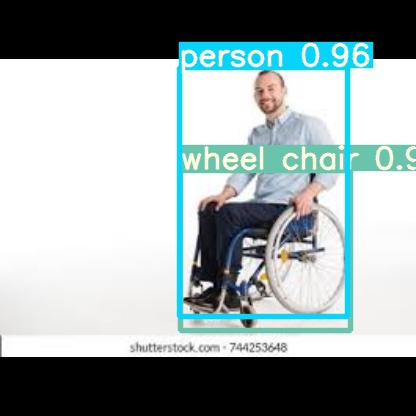

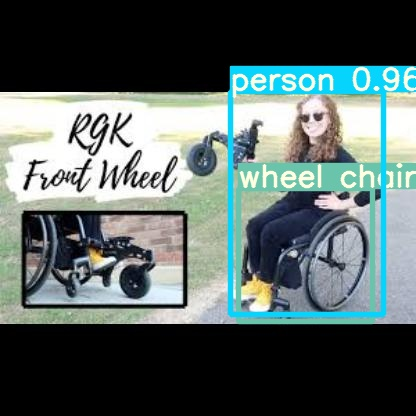

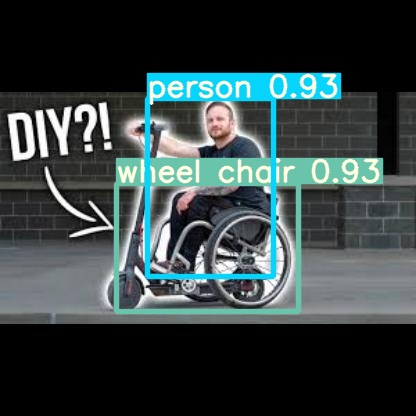

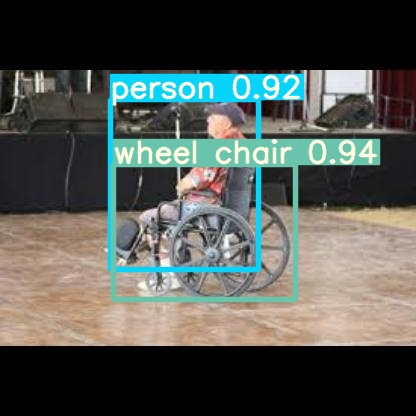

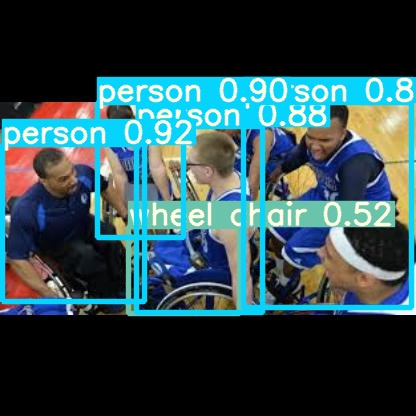

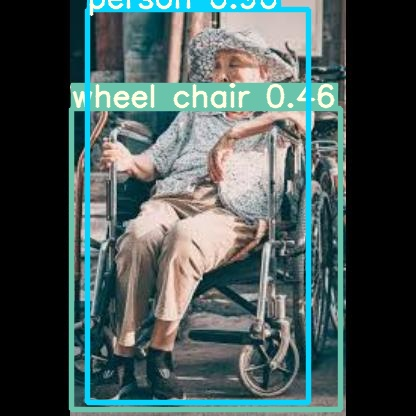

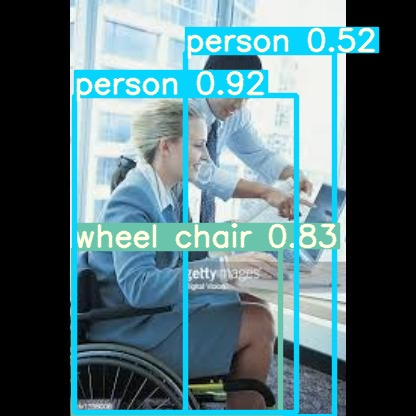

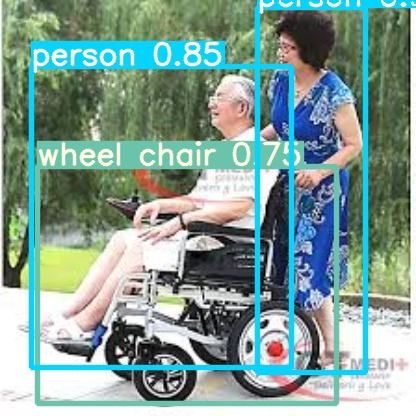

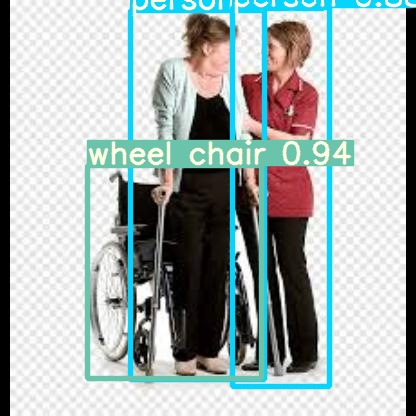

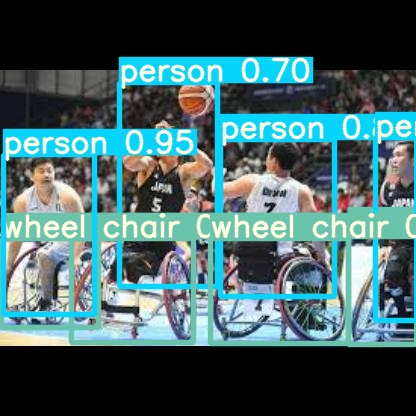

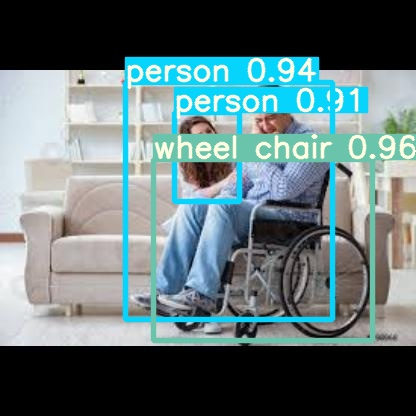

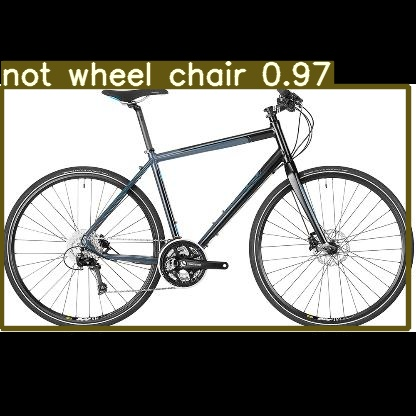

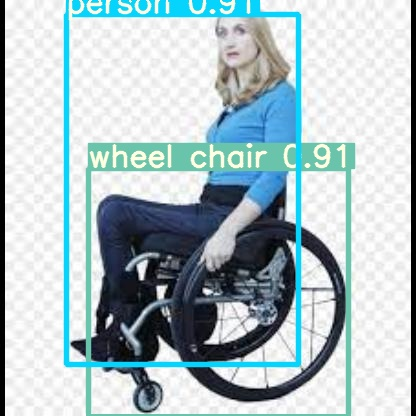

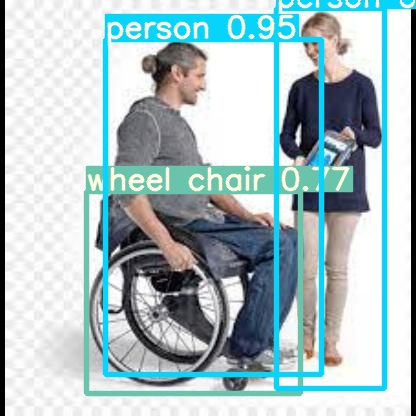

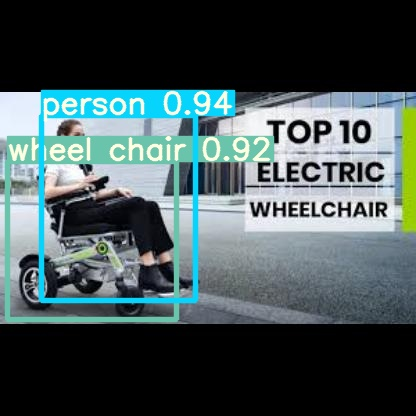

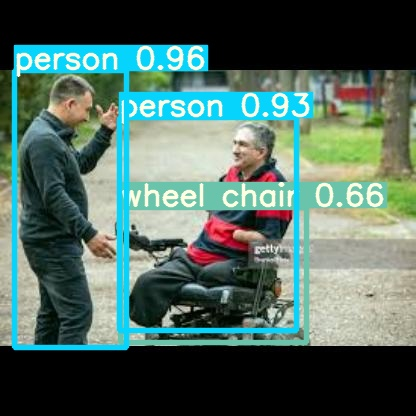

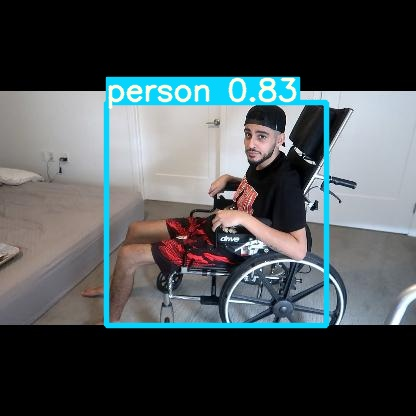

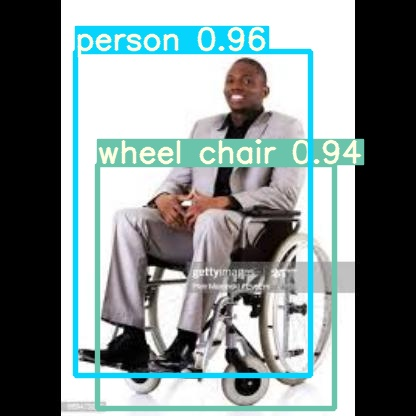

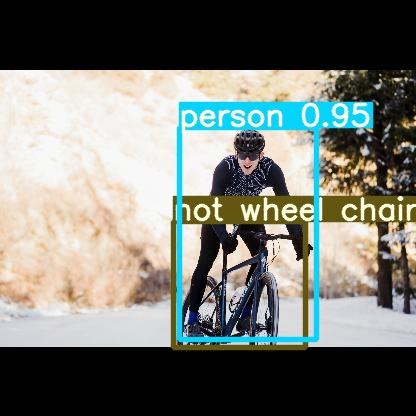

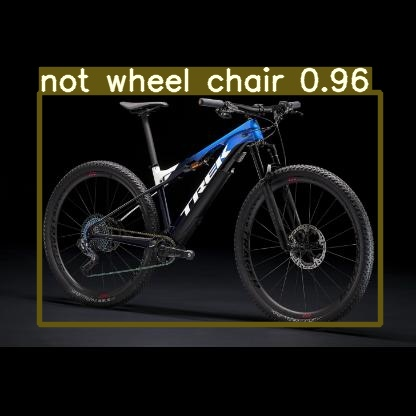

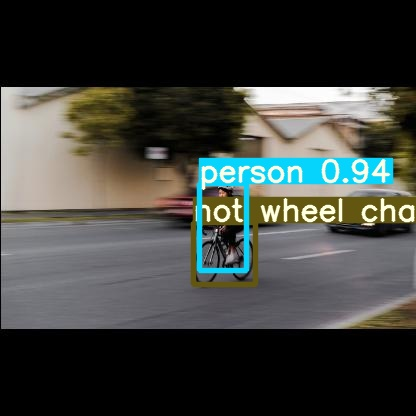

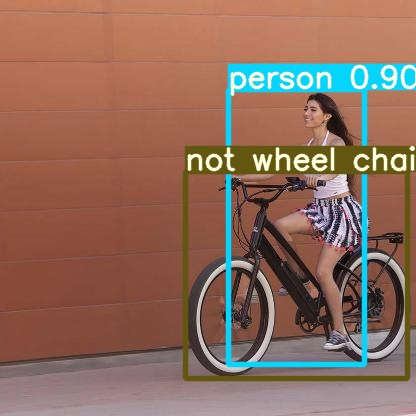

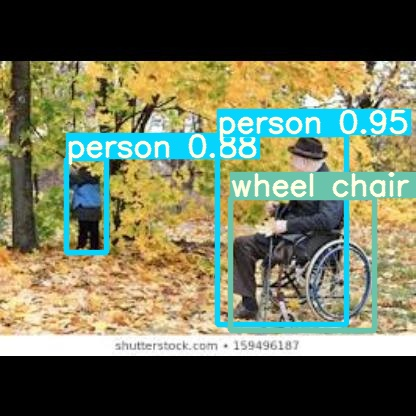

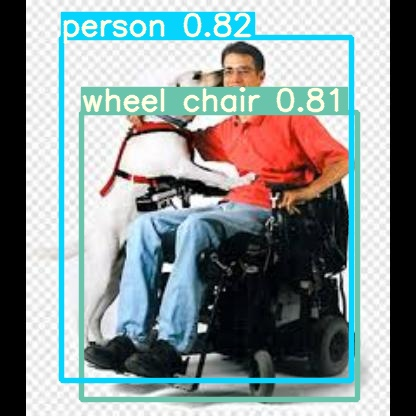

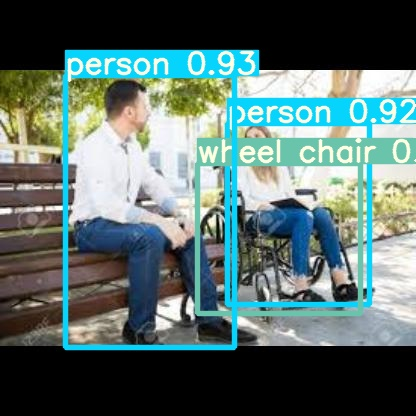

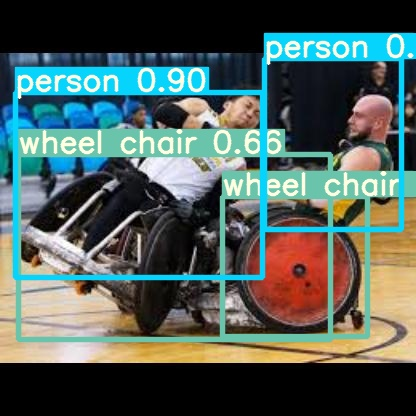

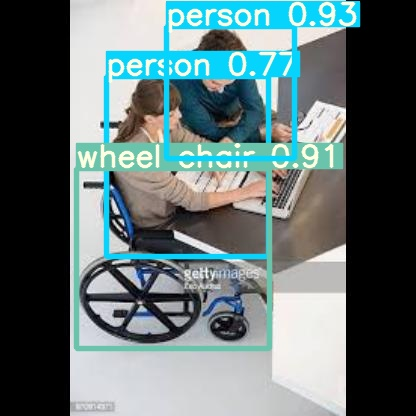

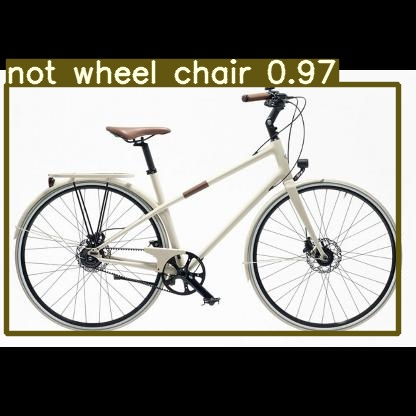

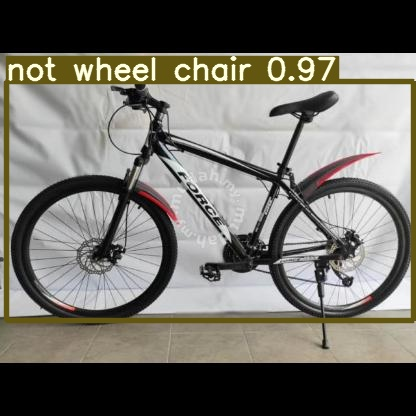

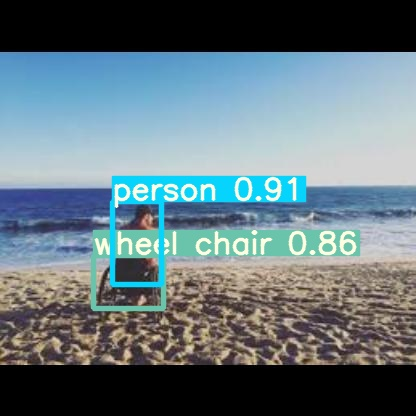

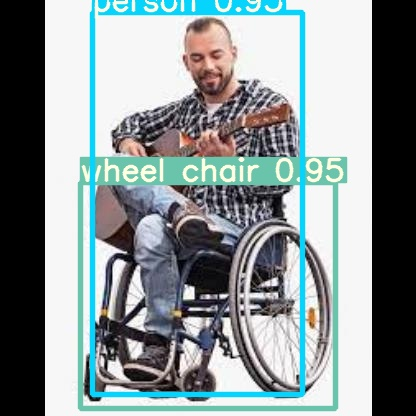

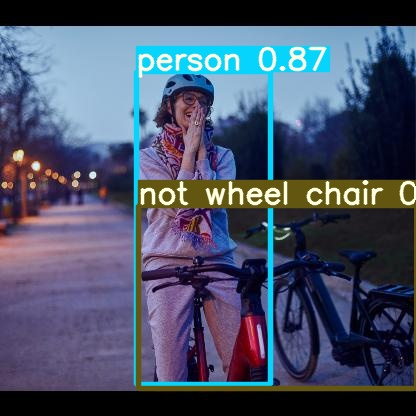

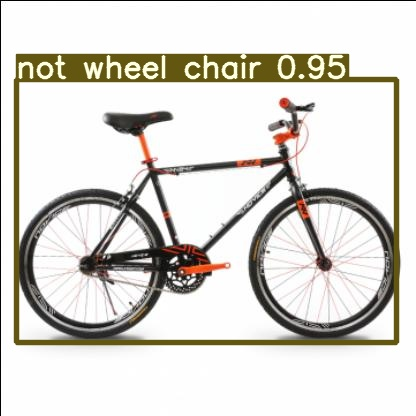

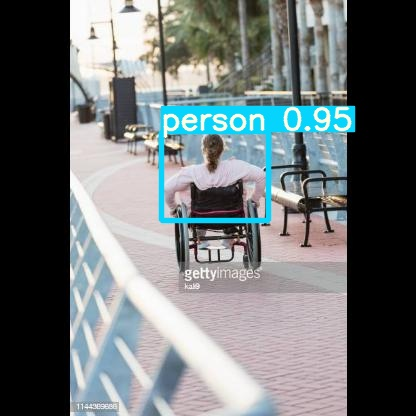

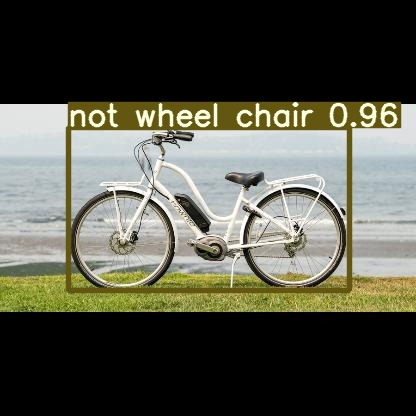

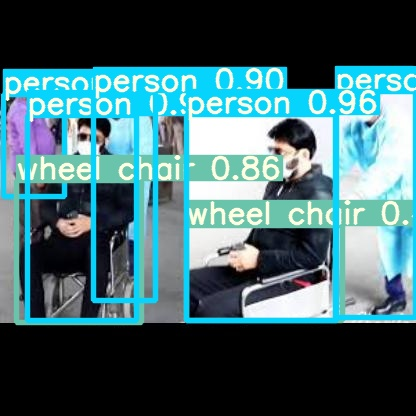

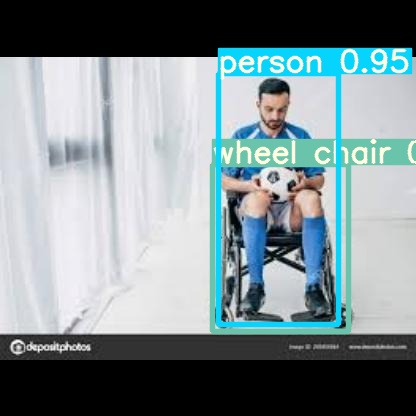

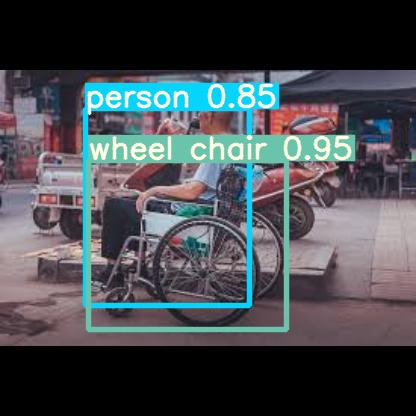

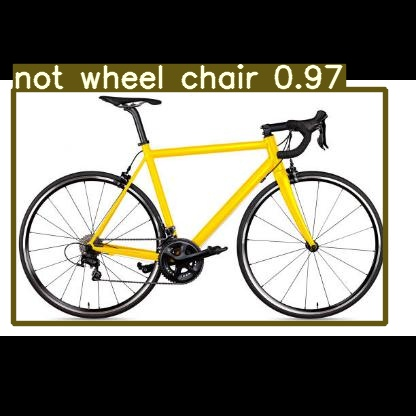

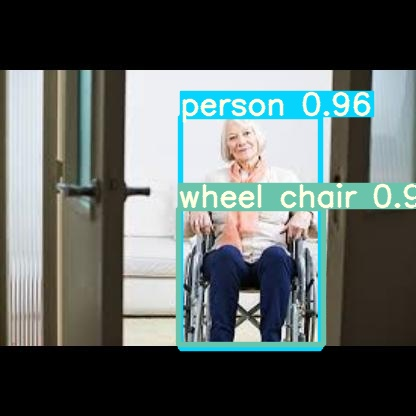

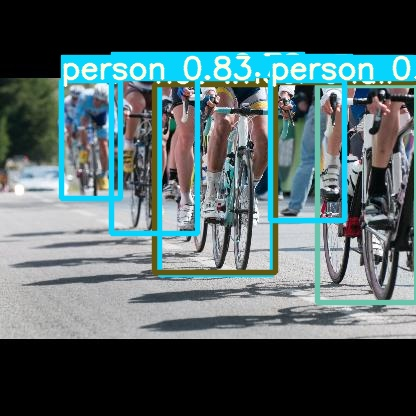

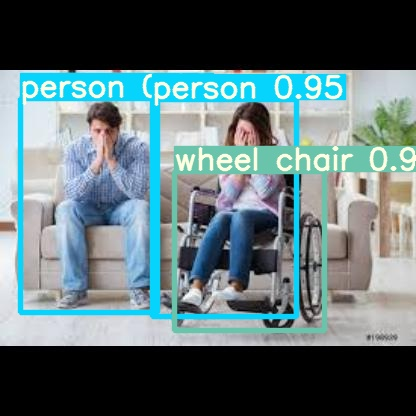

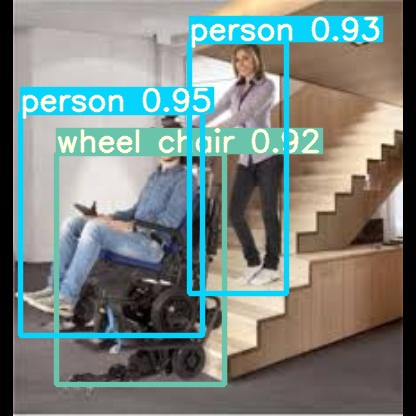

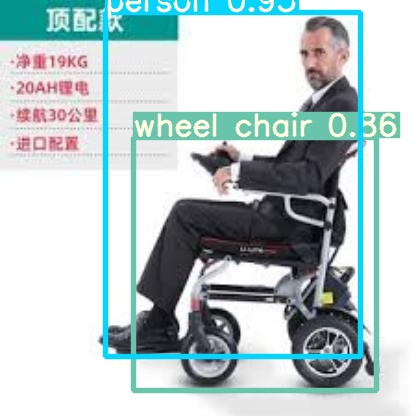

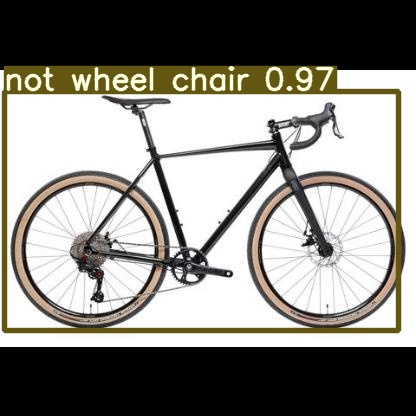

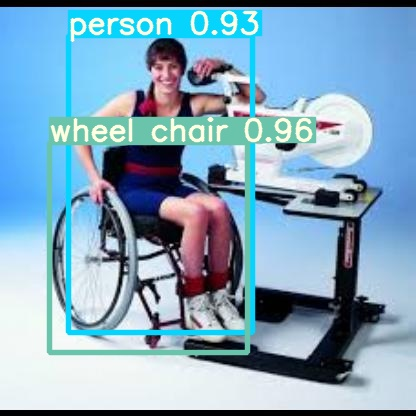

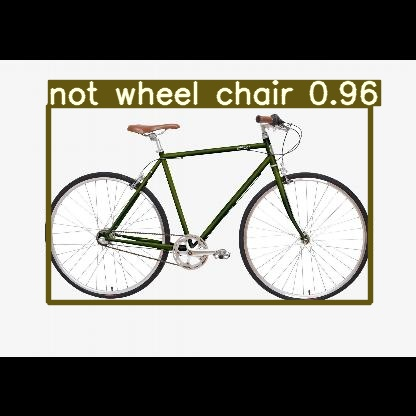

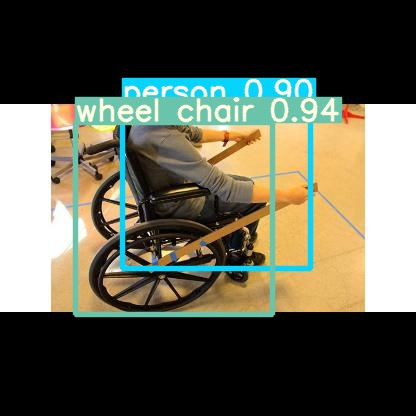

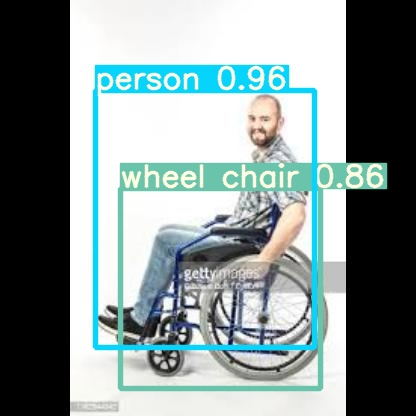

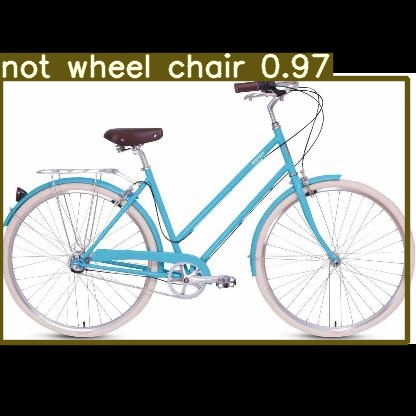

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

## **Step 9: Export saved YOLOv5 weights for future inference.**

Make sure to mount your Google Drive first as shown at step 2 then run the code below to copy your best weights onto your Google Drive for future inference. 

In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/MyDrive